# Estudo **comparativo** entre Ação vs. BDR e geração de **relatório em PDF**

In [1]:
# Importação de bibliotecas
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

**Coleta e tratamento de dados**

In [10]:
# Captura dos dados
msft = yf.download(['MSFT34.SA','MSFT'], start = '2024-01-01', progress = False)['Adj Close']

In [11]:
msft.head()

Ticker,MSFT,MSFT34.SA
Date,,
2024-01-02,369.518921,75.711746
2024-01-03,369.249908,75.522209
2024-01-04,366.599579,74.853874
2024-01-05,366.410278,74.843895
2024-01-08,373.325012,75.562111


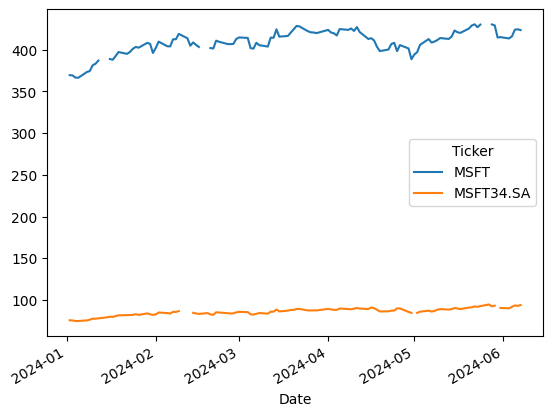

In [12]:
msft.plot();

Ao observar o gráfico, percebemos que há gaps de preço que precisam ser tratados, e também existe distorção na escala pela diferença de magnitude nos preço dos ativos.

**Tratamento de dados faltantes**

A abordagem padrão nesses casos, é o **[FowardFilling](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ffill.html)**, que é um método de "preenchimento para frente", ou seja, o último valor disponível será replicado nas lacunas até que haja novos dados existentes.

In [13]:
msft = msft.ffill(axis = 0)

**Normalização**

Para que o ponto inicial dos dados seja igual e a distorção seja suavizada/eliminada, faremos a normalização dos dados. Precisamos dividir seus valores pelo valor contido na primeira linha, com isso teremos o ponto de partida com o **valor = 1**.

In [14]:
msft_normalizada = msft/msft.iloc[0]

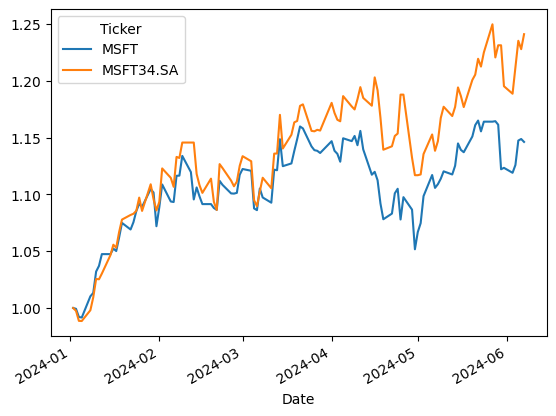

In [15]:
msft_normalizada.plot();

Agora com os valores normalizados e gaps preenchidos, podemos ver que os preços seguem a mesma tendência, e ao final, houve uma leve separação dos preços, um spread de distancia entre eles.

Para aprimorar o estudo, aumentaremos a janela de tempo da análise, possibilitando o teste em várias janelas de tempo, e entender se em algum desses momentos houve diferença significativa na performance da Ação e sua BDR.

Visto que quero ter diversas janelas de tempo para análise, preciso que a variável **start** tenha valores dinâmicos, então seu argumento precisa ser alterado durante a excecução do código.

Criar função para:

*   1 - Capturar os dados;
*   2 - Tratar os dados;
*   3 - Plotar os dados.

In [21]:
def comparar_ativos(data):
    dados = yf.download(['MSFT34.SA','MSFT'], start = data, progress = False)['Adj Close']
    dados = dados.ffill(axis = 0)
    dados_normalizados = dados/dados.iloc[0]
    dados_normalizados.plot();

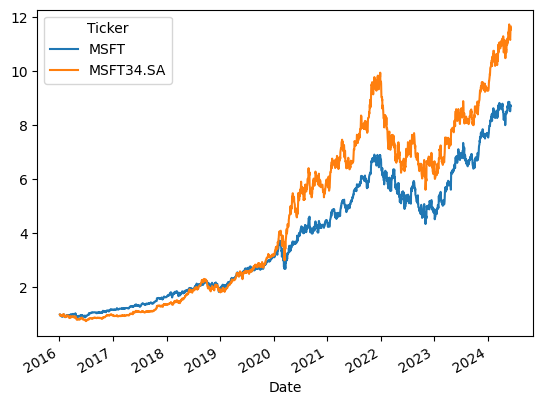

In [22]:
comparar_ativos('2016-01-01')

Agora podemos colocar a função criada dentro de um loop de repetição, para que as datas sejam iteradas a medida em que o código seja executado.

In [26]:
datas = ['2018-01-01','2019-01-01','2020-01-01','2021-01-01','2022-01-01','2023-01-01','2024-01-01']

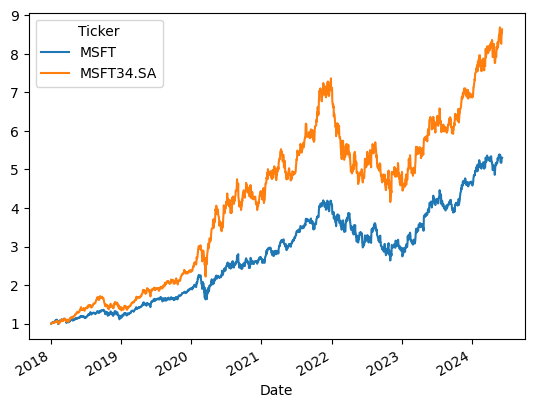

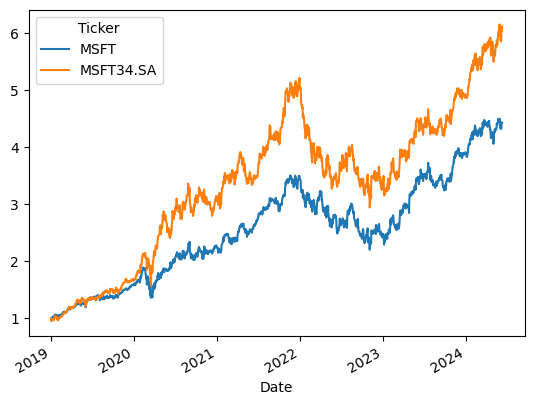

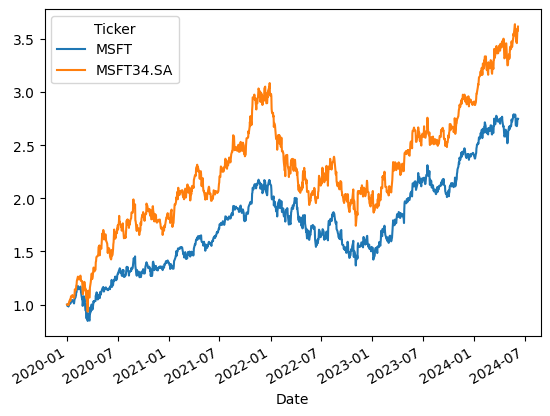

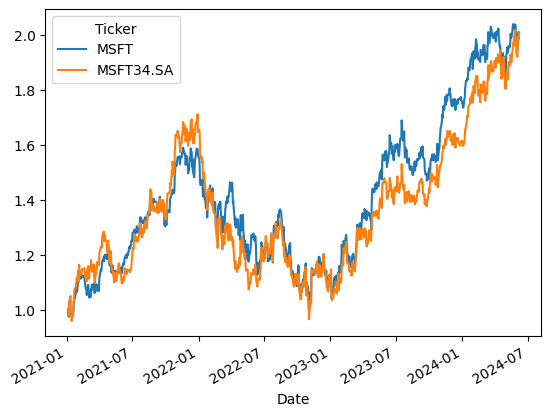

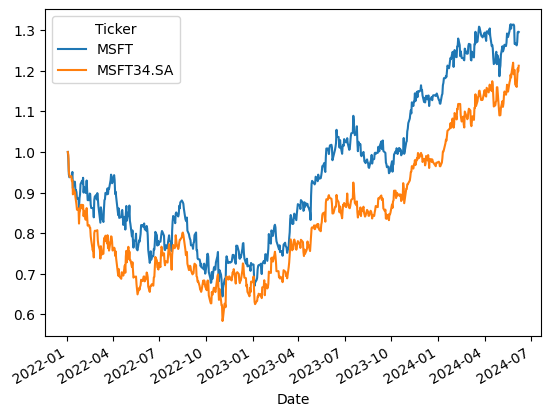

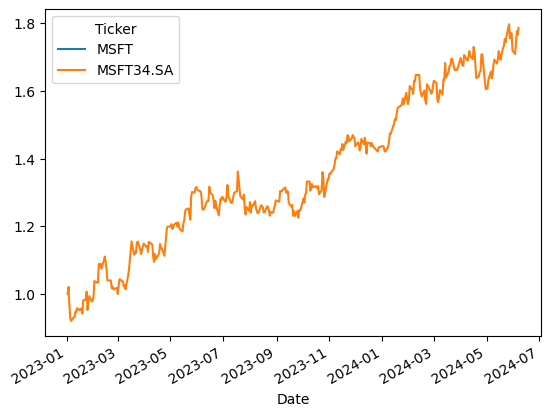

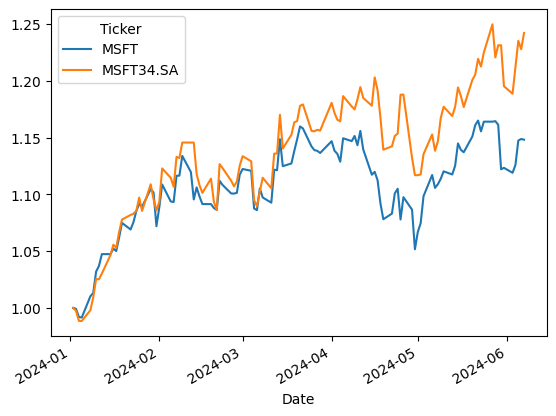

In [27]:
for data in datas:
    comparar_ativos(data)

O código foi executado e conseguiu gerar as plotagens, no entanto, ao analizar o gráfico de 2023, vemos que os valores correspondentes ao preço da **Ação** estão faltando.

Para dar continuidade neste estudo, vamos alterar a forma de tratamento de dados faltantes, fazendo o **[dropna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)**, que simplesmente exclui as linhas com dados faltantes. Esta é uma abordagem menos refinada, que não deve ser usada para fins rigorosos de backtest, vamos usá-la apenas para dar continuidade no estudo didático.

In [28]:
def comparar_ativos(data):
    dados = yf.download(['MSFT34.SA','MSFT'], start = data, progress = False)['Adj Close']
    dados = dados.dropna()
    dados_normalizados = dados/dados.iloc[0]
    dados_normalizados.plot();

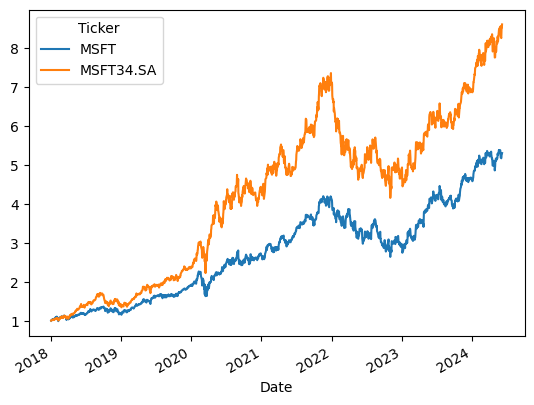

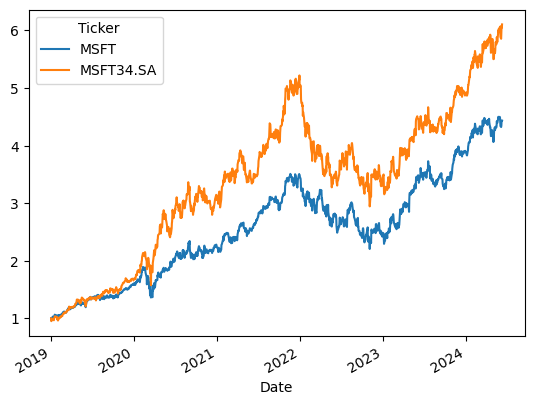

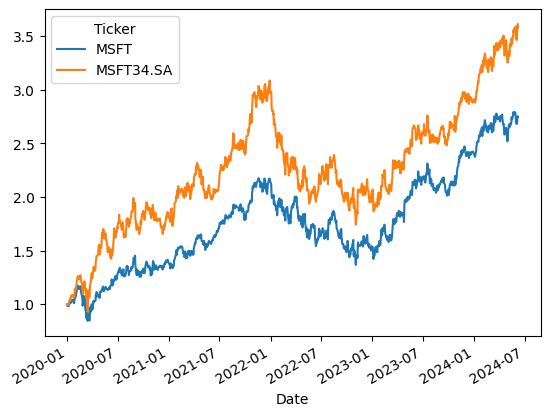

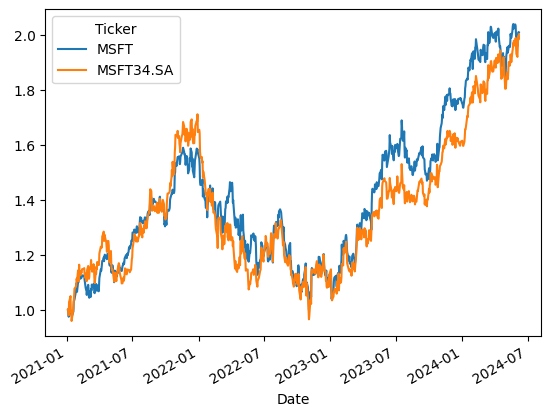

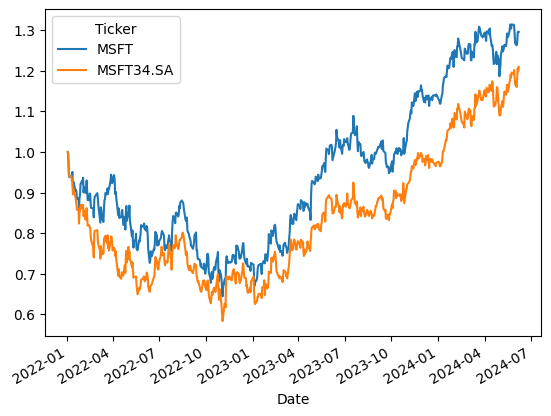

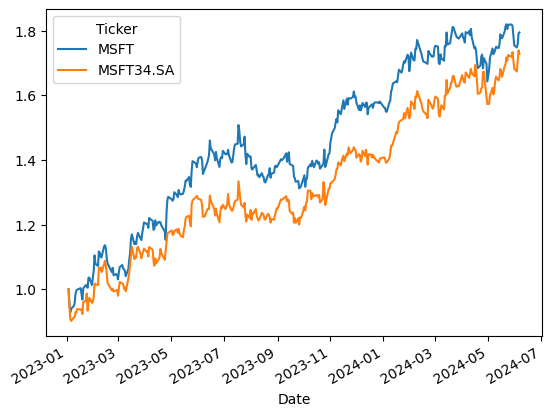

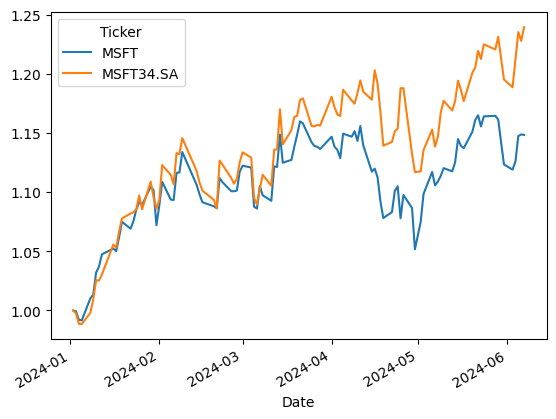

In [29]:
for data in datas:
    comparar_ativos(data)

Agora que temos os gráficos completos, podemos fazer a geração de relatório com essas plotagens.

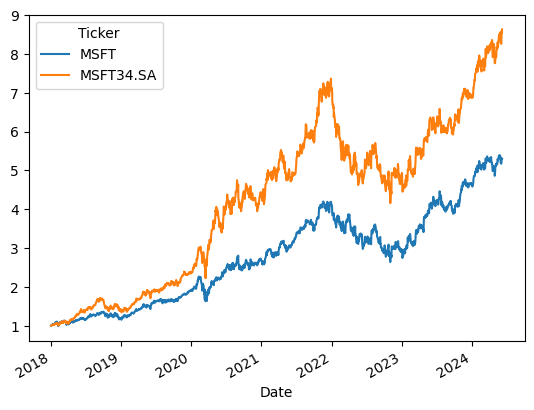

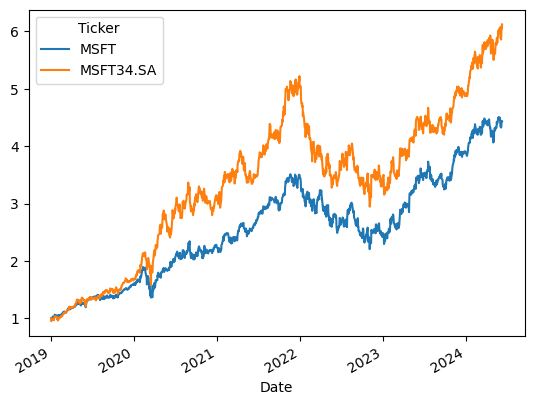

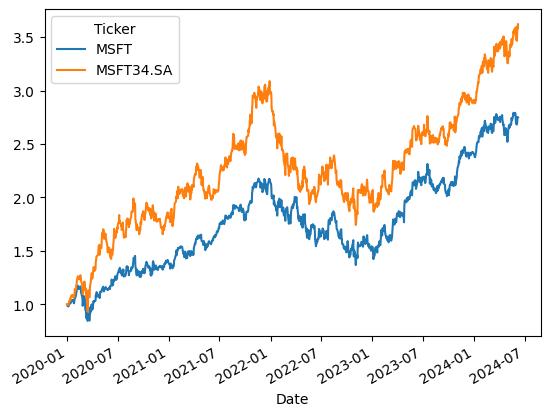

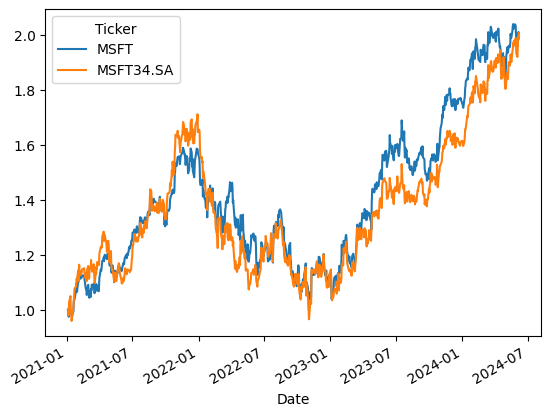

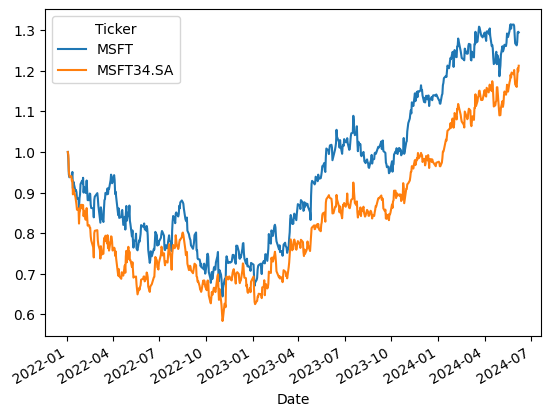

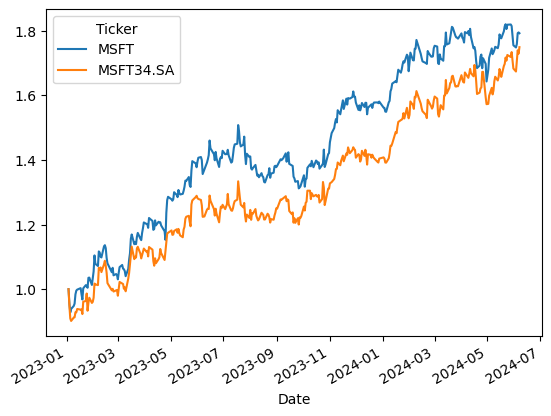

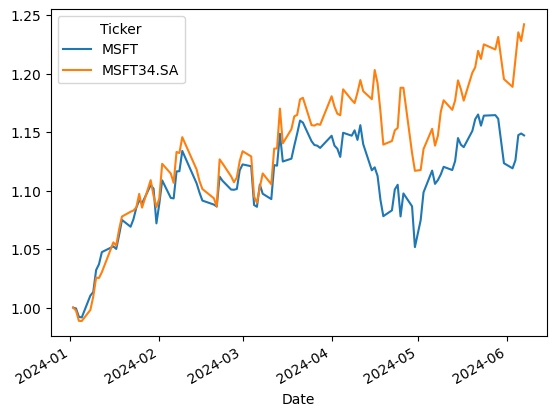

In [30]:
# Criando área da plotagem:
relatorio = PdfPages('comparativo_acao_bdr.pdf')

# Populando a área da plotagem:
for data in datas:
    relatorio.savefig(comparar_ativos(data))

# Encerrando a geração do relatório:
relatorio.close()

Até o momento fizemos a comparação da rentabilidade nominal dos ativos, mas para que haja comparação justa precisamos estudar o efeito do câmbio sobre esse tipo de investimento, observando o efeito do dólar na relação entre a ação e sua BDR.

Para fazer o investimento na Ação, o investidor precisa a compra da cota em dólares, para isso ser possível, há operação de câmbio "Real -> Dólar" pela corretora, e para realizar a operação, o processo seria o inverso.

In [6]:
# Coletando dados de preço e cotação do dólar
dados_cambio = yf.download(['MSFT34.SA','MSFT','USDBRL=X'], start = '2024-01-01', progress = False)['Adj Close']
dados_cambio = dados_cambio.dropna()

In [7]:
# Criando nova coluna com o preço da Ação convertido para BRL
dados_cambio['MSFT_BRL'] = dados_cambio['MSFT'] * dados_cambio['USDBRL=X']

In [8]:
# Normalização
dados_cambio_normalizados = dados_cambio/dados_cambio.iloc[0]

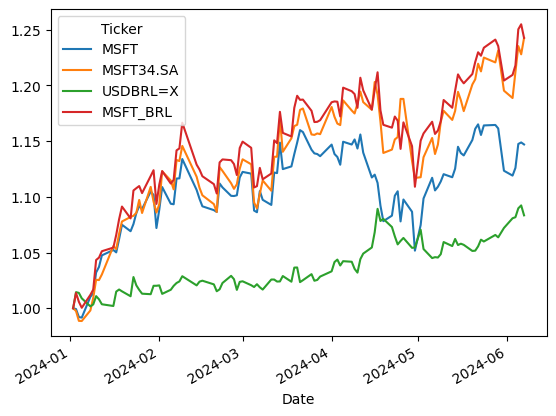

In [9]:
dados_cambio_normalizados.plot();

Podemos ver que, após eliminar a diferença cambial, o spread entre o preço da Ação e seu BDR diminui significantemente.

Agora podemos implementar essa análise cambial à função criada anteriormente.

In [10]:
def comparar_ativos_cambio(data):
    dados = yf.download(['MSFT34.SA','MSFT','USDBRL=X'], start = data, progress = False)['Adj Close']
    dados = dados.dropna()
    dados['MSFT_BRL'] = dados['MSFT'] * dados['USDBRL=X']
    dados_normalizados = dados/dados.iloc[0]
    dados_normalizados.plot();

In [11]:
datas = ['2018-01-01','2019-01-01','2020-01-01','2021-01-01','2022-01-01','2023-01-01','2024-01-01']

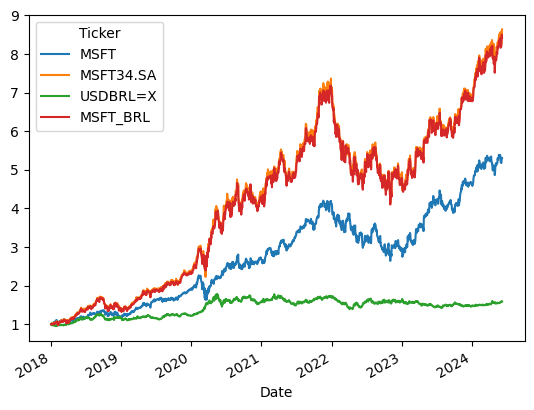

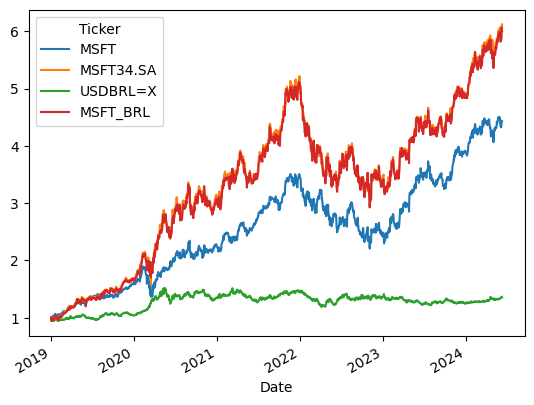

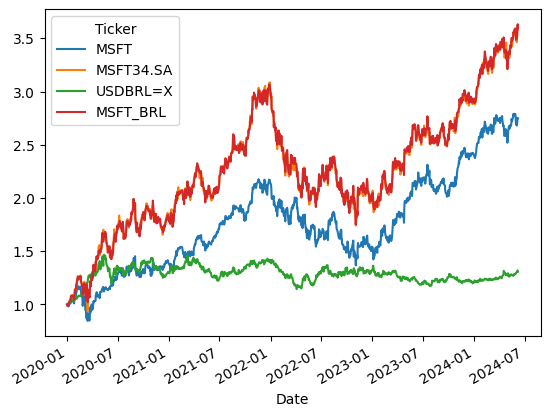

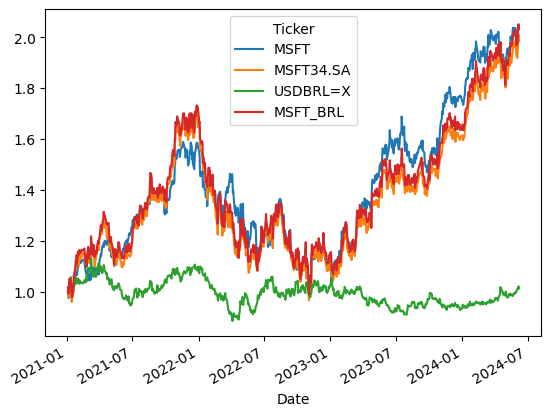

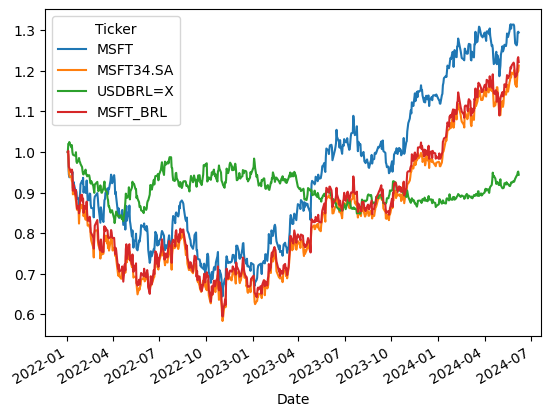

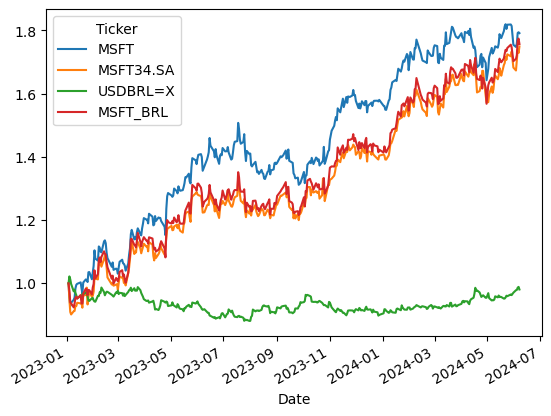

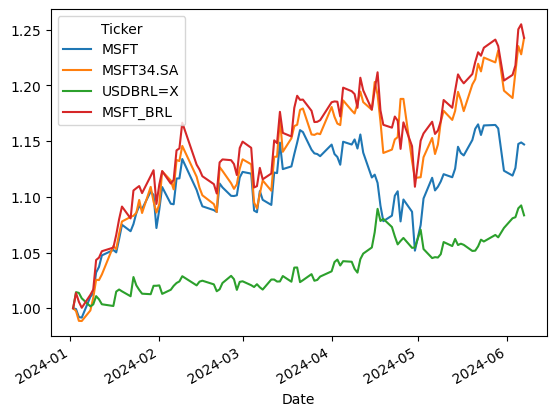

In [12]:
# Criando área da plotagem:
relatorio = PdfPages('comparativo_acao_bdr_cambio.pdf')

# Populando a área da plotagem:
for data in datas:
    relatorio.savefig(comparar_ativos_cambio(data))

# Encerrando a geração do relatório:
relatorio.close()

Podemos perceber que após eliminar o efeito cambial, o spread diminui em todos os períodos.